# **Exploratory Data Analysis**

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

**Load the Titanic dataset**

In [3]:
df = pd.read_csv("/content/titanic_dataset.csv")

**Display the first 5 rows**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Display the last 5 rows**

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Dimensions of the dataset**

In [6]:
df.shape

(891, 12)

**Datatypes of each feature**

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Exploring categorical features by counting unique values in each category**

In [8]:
categorical_features=['Age','Sex','Embarked']

for feature in categorical_features:
  print(f"Unique values for {feature}:")
  print(df[feature].value_counts())
  print()

Unique values for Age:
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

Unique values for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Unique values for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



# **Alternative Method**

In [10]:
df['Age'].nunique()

88

In [11]:
df['Sex'].nunique() # Unique values of Sex

2

In [12]:
df['Embarked'].nunique() # Unique values of Embarked

3

**Investigate missing values in the dataset and determine the percentage of missing values in each feature**

In [13]:
df.isnull().sum() # Number of missing values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.isnull().sum()/len(df)*100 # percentage of missing values in each feature

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## **Handling Missing Values**

In [15]:
df.shape

(891, 12)

**Determine the percentage of missing values for each feature**

In [16]:
df['PassengerId'].isnull().sum() / len(df) * 100

0.0

In [17]:
df['Survived'].isnull().sum() / len(df) * 100

0.0

In [18]:
df['Pclass'].isnull().sum() / len(df) * 100

0.0

In [19]:
df['Name'].isnull().sum() / len(df) * 100

0.0

In [20]:
df['Sex'].isnull().sum() / len(df) * 100

0.0

In [21]:
df['Age'].isnull().sum() / len(df) * 100

19.865319865319865

In [22]:
df['SibSp'].isnull().sum() / len(df) * 100

0.0

In [23]:
df['Parch'].isnull().sum() / len(df) * 100

0.0

In [24]:
df['Ticket'].isnull().sum() / len(df) * 100

0.0

In [25]:
df['Fare'].isnull().sum() / len(df) * 100

0.0

In [26]:
df['Cabin'].isnull().sum() / len(df) * 100

77.10437710437711

In [27]:
df['Embarked'].isnull().sum() / len(df) * 100

0.22446689113355783

**2.3 Removing the missing values from the dataset**

In [28]:
df.dropna(inplace = True)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Checking for duplicate values in the dataset**

In [30]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows are ",duplicate_rows.shape)

Duplicate rows are  (0, 12)


In [31]:
df.drop_duplicates()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [32]:
df.shape

(183, 12)

## **Descriptive Statistics**

In [38]:
describe = df.describe()
describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Here is a breakdown of the statistics provided by the `.describe()` function:

1. **Count**: The number of non-null values in each column.
2. **Mean**: The average value of each column.
3. **Standard Deviation (std)**: The measure of the amount of variation or dispersion in each column.
4. **Minimum (min)**: The smallest value in each column.
5. **25th Percentile (25%)**: Also known as the first quartile (Q1), this represents the value below which 25% of the data falls.
6. **50th Percentile (50%)**: Also known as the median, this represents the value below which 50% of the data falls.
7. **75th Percentile (75%)**: Also known as the third quartile (Q3), this represents the value below which 75% of the data falls.
8. **Maximum (max)**: The largest value in each column.

In [40]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


## **OR**

In [47]:
correlation = df[['Age', 'Survived']].corr()
print(correlation)

               Age  Survived
Age       1.000000 -0.254085
Survived -0.254085  1.000000


**Visualize the correlation matrix using a heatmap**

<Axes: >

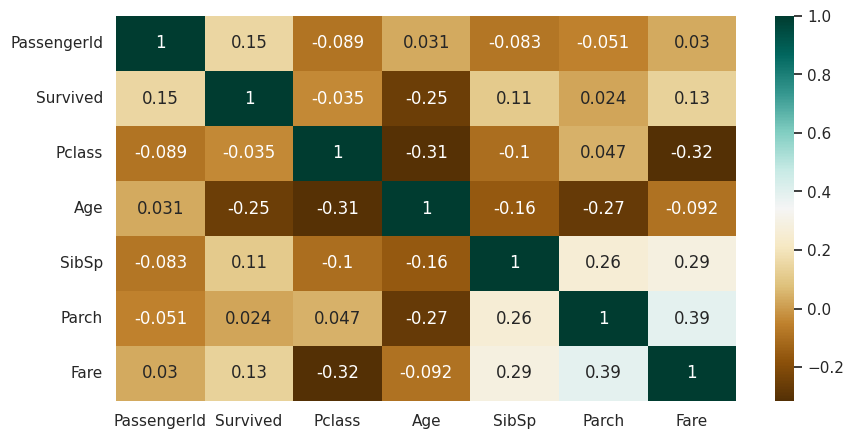

In [49]:
plt.figure(figsize=(10,5))    # Adjusting the size of figure, you can change it

correlation = numeric_columns.corr()       # Calculating the correlation

sns.heatmap(correlation,cmap="BrBG",annot=True)  # Displaying the correlation using the heap map    # Here Br: Brown. B: Blue, G: Green

# Data Visualization

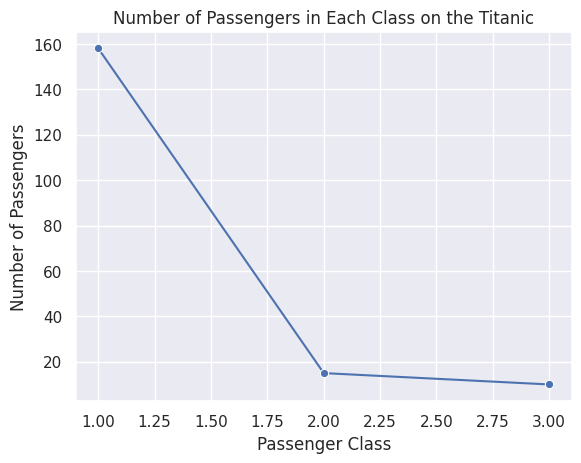

In [52]:
#Line plot for number of passenger in each class

class_count = df['Pclass'].value_counts().sort_index()

sns.lineplot(x=class_count.index, y= class_count.values, marker='o')

plt.title('Number of Passengers in Each Class on the Titanic')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')

plt.show()

<ipython-input-53-c2974eb2ee83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_labels, y=survival_counts.values, palette='viridis')


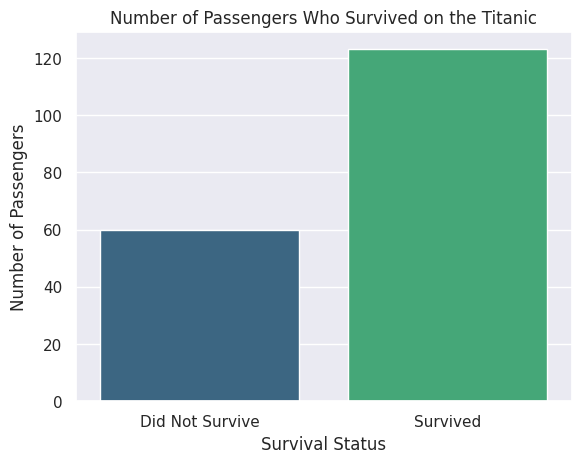

In [53]:
survival_counts = df['Survived'].value_counts().sort_index()
survival_labels = ['Did Not Survive', 'Survived']


sns.barplot(x=survival_labels, y=survival_counts.values, palette='viridis')

# Add title and labels
plt.title('Number of Passengers Who Survived on the Titanic')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()

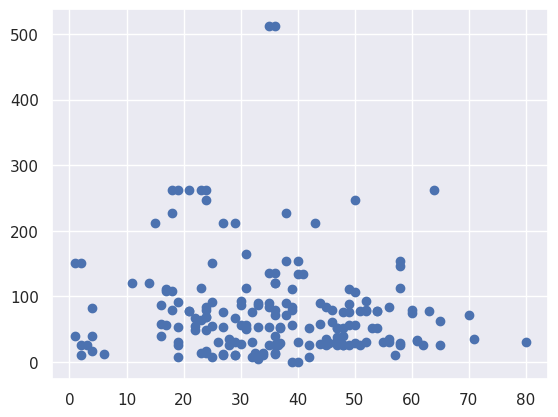

In [56]:
#scatter plot of Age and Fare

plt.scatter(df['Age'], df['Fare'])
plt.show()

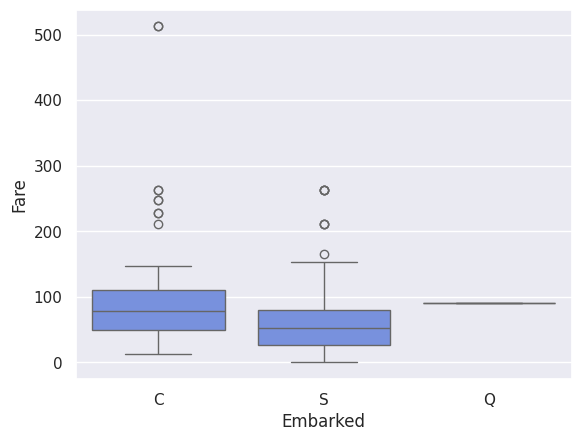

In [67]:
sns.boxplot(x='Embarked',y='Fare',data=df)
plt.show()

**Box Plot with Customized Appearance**

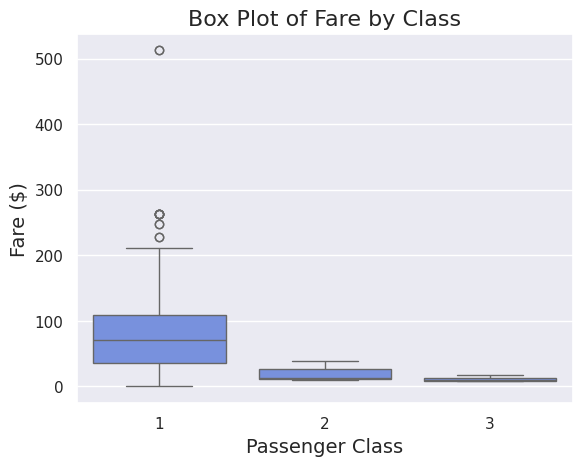

In [62]:
sns.set_palette('coolwarm')
sns.boxplot(x='Pclass',y='Fare', data=df)
plt.title("Box Plot of Fare by Class", fontsize= 16)
plt.xlabel('Passenger Class', fontsize = 14)
plt.ylabel('Fare ($)', fontsize =14)
plt.show()

<ipython-input-69-0e2009de842e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Age', data=df, palette='viridis')


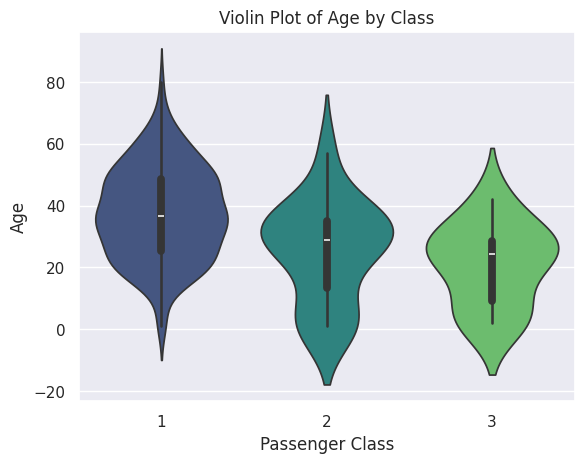

In [69]:
sns.violinplot(x='Pclass', y='Age', data=df, palette='viridis')
plt.title('Violin Plot of Age by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

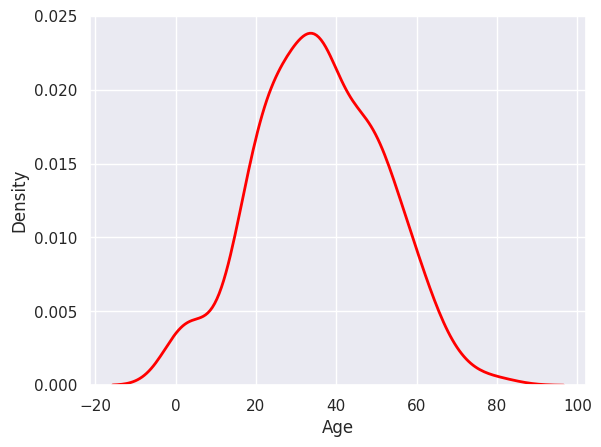

In [70]:
sns.kdeplot(df['Age'], color= 'red', linewidth = 2)